In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.svm import SVC
import scipy.fft
from scipy import stats
from scipy.stats import norm

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

from sklearn import linear_model
from sklearn.linear_model import BayesianRidge
from sklearn.inspection import permutation_importance, plot_partial_dependence
from sklearn.multioutput import MultiOutputRegressor

from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

In [42]:
def graf_car(y_p_car, y_car_pip, s):
    car = pd.DataFrame(data=y_p_car, columns=['y_predicted'])
    df_car = pd.DataFrame(data=y_car_pip, columns=['y_true'])
    df_car = pd.concat([car,df_car], axis=1)

    
    title = "CAR "+s+" label/prediction"
    plt.title(title)
    sns.scatterplot(data=df_car,x='y_predicted', y='y_true')
    plt.show()
    

In [43]:
def graf_camion(y_p_camion, y_camion_pip, s):

    camion = pd.DataFrame(data=y_p_camion, columns=['y_predicted'])
    df_camion = pd.DataFrame(data=y_camion_pip, columns=['y_true'])
    df_camion = pd.concat([camion,df_camion], axis=1)

    
    title = "CAMION "+s+" label/prediction"
    plt.title(title)
    sns.scatterplot(data=df_camion,x='y_predicted', y='y_true')
    plt.show()

In [44]:
d = pd.read_pickle('day_time.pkl')
df = pd.DataFrame(d)
print(df.columns)

d = pd.read_pickle('mean_f.pkl')
mean_f = pd.DataFrame(d)
print(mean_f)

d = pd.read_pickle('median_f.pkl')
median_f = pd.DataFrame(d)
#print(mean_f)

d = pd.read_pickle('std_f.pkl')
std_f = pd.DataFrame(d)

d = pd.read_pickle('fft_mean_f.pkl')
fft_mean_f = pd.DataFrame(d)
#print(fft_mean_f)

d = pd.read_pickle('max_abs.pkl')
max_abs = pd.DataFrame(d)

d = pd.read_pickle('max.pkl')
max_ = pd.DataFrame(d)

d = pd.read_pickle('min.pkl')
min_ = pd.DataFrame(d)

d = pd.read_pickle('kurtuisi.pkl')
kurtuisi = pd.DataFrame(d)

d = pd.read_pickle('skew.pkl')
skew = pd.DataFrame(d)

d = pd.read_pickle('abs_values_sum.pkl')
abs_values_sum = pd.DataFrame(d)

d = pd.read_pickle('abs_energy.pkl')
abs_energy = pd.DataFrame(d)

d = pd.read_pickle('median_abs_deviation.pkl')
median_abs_deviation = pd.DataFrame(d)

d = pd.read_pickle('elem_over_mean.pkl')
elem_over_mean = pd.DataFrame(d)

d = pd.read_pickle('root_mean_square.pkl')
root_mean_square = pd.DataFrame(d)

Index(['t', 'x10D41', 'y10D41', 'z10D41', 'x10D42', 'y10D42', 'z10D42',
       'x10D43', 'y10D43', 'z10D43', 'x10S40', 'y10S40', 'z10S40', 'x10S41',
       'y10S41', 'z10S41', 'x10S42', 'y10S42', 'z10S42', 'x10S43', 'y10S43',
       'z10S43', 'rilevazione', 'y_car', 'y_camion'],
      dtype='object')
    x10D41_mean  y10D41_mean  z10D41_mean  x10D42_mean  y10D42_mean  \
0      0.147599     0.974770     0.073697     0.020986     1.004277   
0      0.147642     0.974572     0.073701     0.020986     1.004586   
0      0.147684     0.974305     0.073696     0.020966     1.004979   
0      0.147678     0.974288     0.073711     0.020986     1.005066   
0      0.147628     0.974248     0.073752     0.020999     1.005029   
..          ...          ...          ...          ...          ...   
0      0.147553     0.974706     0.073661     0.020888     1.004350   
0      0.147576     0.974612     0.073676     0.020905     1.004305   
0      0.147602     0.974638     0.073658     0.020960     

In [45]:
data = pd.concat( [ median_abs_deviation, abs_values_sum, median_f, abs_energy, root_mean_square, std_f, max_, min_, kurtuisi, skew, mean_f, elem_over_mean], axis=1)
print(data)

   x10D41_median_abs_deviation y10D41_median_abs_deviation  \
0     [0.00015259021896696368]     [0.0014877546349278958]   
0     [0.00015259021896696368]     [0.0025558861676966416]   
0      [0.0002288853284504455]       [0.00499732967116806]   
0      [0.0006103608758678547]       [0.00621805142290377]   
0      [0.0003814755474174092]      [0.006904707408255106]   
..                         ...                         ...   
0      [0.0003814755474174092]       [0.00957503624017697]   
0      [0.0003814755474174092]      [0.008049134050507334]   
0     [0.00030518043793392735]      [0.007705806057831666]   
0     [0.00015259021896696368]      [0.005951018539711583]   
0     [0.00015259021896696368]      [0.005493247882810692]   

   z10D41_median_abs_deviation x10D42_median_abs_deviation  \
0      [0.0016021972991531255]    [0.00015259021896696714]   
0      [0.0010681315327687457]    [0.00015259021896696714]   
0      [0.0010681315327687457]    [0.00022888532845044898]   
0      

In [46]:
lista = ['y_car','y_camion']
y_c=pd.DataFrame(df['y_car'][df['t']==0])
y_c.to_numpy()

y_cm=pd.DataFrame(df['y_camion'][df['t']==0])
y_cm.to_numpy()

y_car = np.array([y_c.max()])
y_camion = np.array([y_cm.max()])
for t in range(1,712):   
    y_c=pd.DataFrame(df['y_car'][df['t']==t])
    y_c.to_numpy()
    y_car = np.append(y_car,y_c.max())
    y_cm=pd.DataFrame(df['y_camion'][df['t']==t])
    y_cm.to_numpy()
    y_camion = np.append(y_camion,y_cm.max())
print(y_car,y_camion)

[1.  2.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  0.  0.  0.  0.  0.
 0.  0.  0.  1.  1.2 2.  2.8 1.  0.  0.  1.  2.  1.  0.  0.  0.  0.  0.
 0.  0.  1.  1.  0.  1.  3.  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.2 1.  0.8 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  2.
 1.2 1.  0.8 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.2 2.  1.8 0.  0.  1.  3.2 4.  1.8 0.  0.  0.  2.2 3.
 0.8 0.  0.  0.  0.  0.  1.  1.  0.  0.  0.2 2.  1.8 0.  1.  1.  0.  0.
 1.  1.  0.2 1.  0.8 0.  0.  0.  0.  1.  1.  1.  1.  0.  0.  0.  1.  1.
 0.  0.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.2 1.  0.8 0.  0.  0.  1.  2.  1.  0.  0.  0.  0.  0.
 0.  0.  0.  1.  1.  0.  0.  1.  1.2 1.  0.8 0.  0.  0.  2.  2.  2.  2.
 0.  1.  1.  1.  3.  3.  1.  0.  0.  1.  1.  1.  1.  0.  0.  1.  1.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 

In [47]:
X = data
y_car = pd.DataFrame(y_car)
y_camion = pd.DataFrame(y_camion)
#y =pd.concat( [y_car, y_camion], axis=1)

X_train_car, X_test_car, y_train_car, y_test_car = train_test_split(X, y_car)
X_train_camion, X_test_camion, y_train_camion, y_test_camion = train_test_split(X, y_camion)

C:\Users\giovy\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


MSE_car_pip_svr: 0.431402526241438
MAE_car_pip_svr: 0.4833010900056632
R2_car_score_svr: 0.2419849533700169


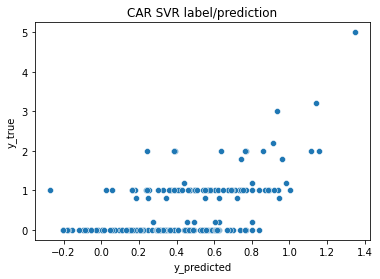

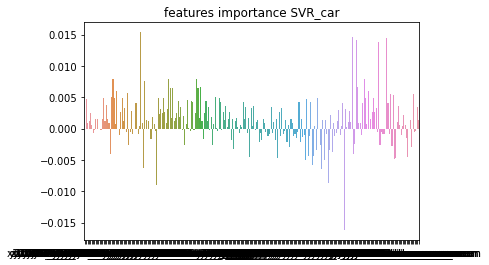

In [79]:
####SVR CAR####

steps_svr = [
    ( 'scaler', StandardScaler() ),
    ('svr', SVR(kernel = 'rbf',epsilon=0.1))
]


pipeline_svr_car = Pipeline(steps_svr)
pipeline_svr_car.fit(X_train_car,y_train_car)
y_p_car_svr = pipeline_svr_car.predict(X_test_car)
y_car_pip_svr = y_test_car


### METRICHE MISURA ACCURATEZZA PER CAR
mse_car_pip_svr = mean_squared_error(y_car_pip_svr, y_p_car_svr)
print("MSE_car_pip_svr:", mse_car_pip_svr)
mae_car_pip_svr = mean_absolute_error(y_car_pip_svr, y_p_car_svr)
print("MAE_car_pip_svr:", mae_car_pip_svr)
r2_car_score_svr= r2_score(y_car_pip_svr, y_p_car_svr)
print("R2_car_score_svr:", r2_car_score_svr)


###STAMPA GRAFICI 

graf_car(y_p_car_svr, y_car_pip_svr.values, "SVR")
plt.show()

res = permutation_importance(pipeline_svr_car, X_test_car, y_test_car, n_repeats=1)
df = pd.DataFrame(res['importances'].T, columns= X_train_car.columns)
plt.title('features importance SVR_car')
sns.barplot(data=df)
plt.show()


MSE_camion_pip_svr: 0.10991005420678181
MAE_camion_pip_svr: 0.2070853580035625
R2_camion_score_svr: 0.6409907054136418


C:\Users\giovy\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


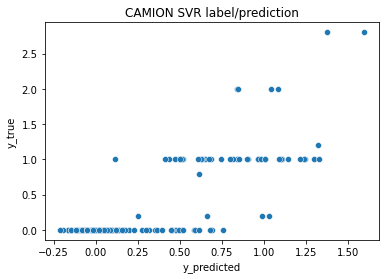

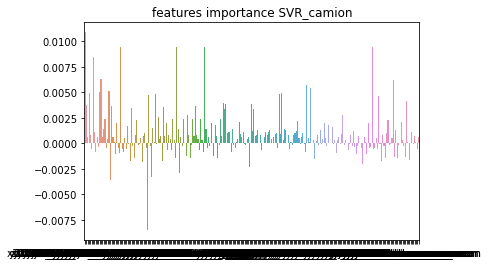

In [80]:
####SVR CAMION####
steps_svr = [
    ( 'scaler', StandardScaler() ),
    ('svr', SVR(kernel = 'rbf',epsilon=0.1))
]

pipeline_svr_camion = Pipeline(steps_svr)
pipeline_svr_camion.fit(X_train_camion, y_train_camion)
y_p_camion_svr = pipeline_svr_camion.predict(X_test_camion)
y_camion_pip_svr = y_test_camion


### METRICHE MISURA ACCURATEZZA PER CAMION
mse_camion_pip_svr = mean_squared_error(y_camion_pip_svr, y_p_camion_svr)
print("MSE_camion_pip_svr:", mse_camion_pip_svr)
mae_camion_pip_svr = mean_absolute_error(y_camion_pip_svr, y_p_camion_svr)
print("MAE_camion_pip_svr:", mae_camion_pip_svr)
r2_camion_score_svr = r2_score(y_camion_pip_svr, y_p_camion_svr)
print("R2_camion_score_svr:", r2_camion_score_svr)


###STAMPA GRAFICI 
graf_camion(y_p_camion_svr, y_camion_pip_svr.values, "SVR")
plt.show()

res = permutation_importance(pipeline_svr_camion, X_test_camion, y_test_camion, n_repeats=1)
df = pd.DataFrame(res['importances'].T, columns= X_train_camion.columns)
plt.title('features importance SVR_camion')
sns.barplot(data=df)
plt.show()

C:\Users\giovy\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (534). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
C:\Users\giovy\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\giovy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MSE_car_pip_MLPRegressor: 0.5476256700819908
MAE_car_pip_MLPRegressor: 0.5350265788726658
R2_car_score_MLPRegressor: 0.03776989564809097


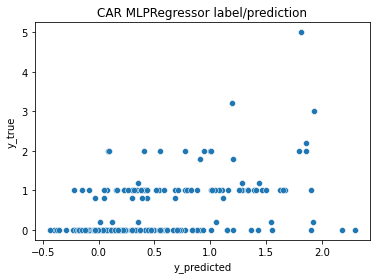

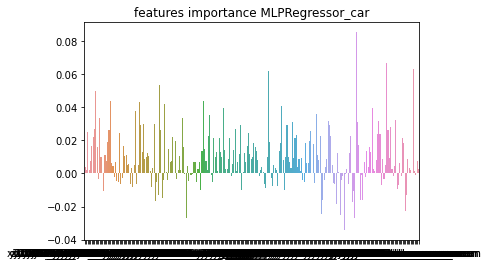

In [81]:
####MLP CAR####

steps_MLPRegressor = [
    ('scaler', QuantileTransformer()),
    ('model', MLPRegressor(hidden_layer_sizes=(18,40), alpha=0.5)),
]

pipeline_MLPRegressor_car = Pipeline(steps_MLPRegressor)
pipeline_MLPRegressor_car.fit(X_train_car,y_train_car)
y_p_car_MLPRegressor = pipeline_MLPRegressor_car.predict(X_test_car)
y_car_pip_MLPRegressor = y_test_car


### METRICHE MISURA ACCURATEZZA PER CAR
mse_car_pip_MLPRegressor = mean_squared_error(y_car_pip_MLPRegressor, y_p_car_MLPRegressor)
print("MSE_car_pip_MLPRegressor:", mse_car_pip_MLPRegressor)
mae_car_pip_MLPRegressor = mean_absolute_error(y_car_pip_MLPRegressor, y_p_car_MLPRegressor)
print("MAE_car_pip_MLPRegressor:", mae_car_pip_MLPRegressor)
r2_car_score_MLPRegressor= r2_score(y_car_pip_MLPRegressor, y_p_car_MLPRegressor)
print("R2_car_score_MLPRegressor:", r2_car_score_MLPRegressor)


###STAMPA GRAFICI 

graf_car(y_p_car_MLPRegressor, y_car_pip_MLPRegressor.values, "MLPRegressor")
plt.show()

res = permutation_importance(pipeline_MLPRegressor_car, X_test_car, y_test_car, n_repeats=1)
df = pd.DataFrame(res['importances'].T, columns= X_train_car.columns)
plt.title('features importance MLPRegressor_car')
sns.barplot(data=df)
plt.show()

C:\Users\giovy\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (534). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
C:\Users\giovy\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


MSE_camion_pip_MLPRegressor: 0.10591204645401248
MAE_camion_pip_MLPRegressor: 0.1765421722118933
R2_camion_score_MLPRegressor: 0.6540497649640278


C:\Users\giovy\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


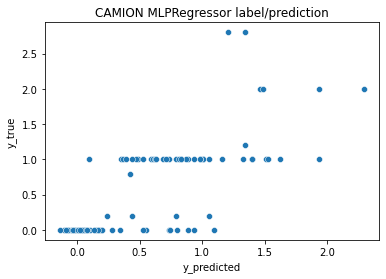

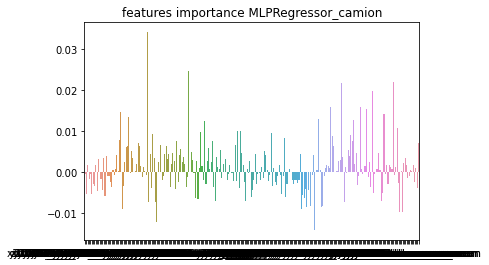

In [82]:
####MLP CAMION####

steps_MLPRegressor = [
    ('scaler', QuantileTransformer()),
    ('model', MLPRegressor(hidden_layer_sizes=(18,40), alpha=0.5)),
]
pipeline_MLPRegressor_camion = Pipeline(steps_MLPRegressor)
pipeline_MLPRegressor_camion.fit(X_train_camion,y_train_camion)
y_p_camion_MLPRegressor = pipeline_MLPRegressor_camion.predict(X_test_camion)
y_camion_pip_MLPRegressor = y_test_camion


### METRICHE MISURA ACCURATEZZA PER CAMION
mse_camion_pip_MLPRegressor = mean_squared_error(y_camion_pip_MLPRegressor, y_p_camion_MLPRegressor)
print("MSE_camion_pip_MLPRegressor:", mse_camion_pip_MLPRegressor)
mae_camion_pip_MLPRegressor = mean_absolute_error(y_camion_pip_MLPRegressor, y_p_camion_MLPRegressor)
print("MAE_camion_pip_MLPRegressor:", mae_camion_pip_MLPRegressor)
r2_camion_score_MLPRegressor= r2_score(y_camion_pip_MLPRegressor, y_p_camion_MLPRegressor)
print("R2_camion_score_MLPRegressor:", r2_camion_score_MLPRegressor)


###STAMPA GRAFICI 

graf_camion(y_p_camion_MLPRegressor, y_camion_pip_MLPRegressor.values, "MLPRegressor")
plt.show()

res = permutation_importance(pipeline_MLPRegressor_camion, X_test_camion, y_test_camion, n_repeats=1)
df = pd.DataFrame(res['importances'].T, columns= X_train_camion.columns)
plt.title('features importance MLPRegressor_camion')
sns.barplot(data=df)
plt.show()

MSE_car_pip_KNeighborsRegressor: 0.47477752808988766
MAE_car_pip_KNeighborsRegressor: 0.5202247191011236
R2_car_score_KNeighborsRegressor: 0.16577097211408132


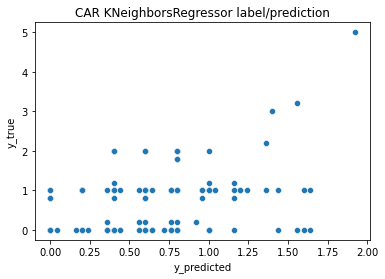

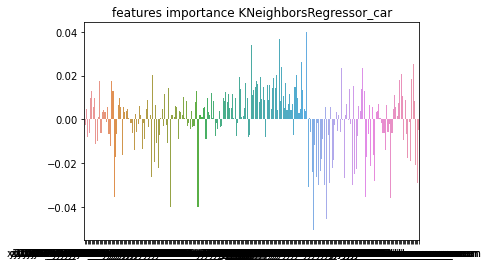

In [83]:
####KNeighborsRegressor CAR####

steps_KNeighborsRegressor = [
    ( 'scaler', StandardScaler() ),
    ('model', KNeighborsRegressor()),
]

pipeline_KNeighborsRegressor_car = Pipeline(steps_KNeighborsRegressor)
pipeline_KNeighborsRegressor_car.fit(X_train_car,y_train_car)
y_p_car_KNeighborsRegressor = pipeline_KNeighborsRegressor_car.predict(X_test_car)
y_car_pip_KNeighborsRegressor = y_test_car


### METRICHE MISURA ACCURATEZZA PER CAR
mse_car_pip_KNeighborsRegressor = mean_squared_error(y_car_pip_KNeighborsRegressor, y_p_car_KNeighborsRegressor)
print("MSE_car_pip_KNeighborsRegressor:", mse_car_pip_KNeighborsRegressor)
mae_car_pip_KNeighborsRegressor = mean_absolute_error(y_car_pip_KNeighborsRegressor, y_p_car_KNeighborsRegressor)
print("MAE_car_pip_KNeighborsRegressor:", mae_car_pip_KNeighborsRegressor)
r2_car_score_KNeighborsRegressor= r2_score(y_car_pip_KNeighborsRegressor, y_p_car_KNeighborsRegressor)
print("R2_car_score_KNeighborsRegressor:", r2_car_score_KNeighborsRegressor)


###STAMPA GRAFICI 

graf_car(y_p_car_KNeighborsRegressor, y_car_pip_KNeighborsRegressor.values, "KNeighborsRegressor")
plt.show()

res = permutation_importance(pipeline_KNeighborsRegressor_car, X_test_car, y_test_car, n_repeats=1)
df = pd.DataFrame(res['importances'].T, columns= X_train_car.columns)
plt.title('features importance KNeighborsRegressor_car')
sns.barplot(data=df)
plt.show()

MSE_camion_pip_KNeighborsRegressor: 0.13582921348314606
MAE_camion_pip_KNeighborsRegressor: 0.19797752808988764
R2_camion_score_KNeighborsRegressor: 0.5563285773195876


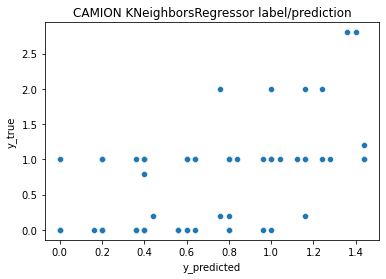

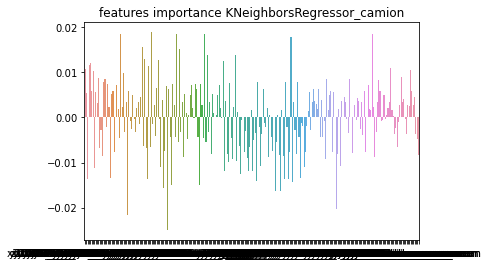

In [84]:
####KNeighborsRegressor CAMION####

steps_KNeighborsRegressor = [
    ( 'scaler', StandardScaler() ),
    ('model', KNeighborsRegressor()),
]

pipeline_KNeighborsRegressor_camion = Pipeline(steps_KNeighborsRegressor)
pipeline_KNeighborsRegressor_camion.fit(X_train_camion,y_train_camion)
y_p_camion_KNeighborsRegressor = pipeline_KNeighborsRegressor_camion.predict(X_test_camion)
y_camion_pip_KNeighborsRegressor = y_test_camion


### METRICHE MISURA ACCURATEZZA PER CAMION
mse_camion_pip_KNeighborsRegressor = mean_squared_error(y_camion_pip_KNeighborsRegressor, y_p_camion_KNeighborsRegressor)
print("MSE_camion_pip_KNeighborsRegressor:", mse_camion_pip_KNeighborsRegressor)
mae_camion_pip_KNeighborsRegressor = mean_absolute_error(y_camion_pip_KNeighborsRegressor, y_p_camion_KNeighborsRegressor)
print("MAE_camion_pip_KNeighborsRegressor:", mae_camion_pip_KNeighborsRegressor)
r2_camion_score_KNeighborsRegressor= r2_score(y_camion_pip_KNeighborsRegressor, y_p_camion_KNeighborsRegressor)
print("R2_camion_score_KNeighborsRegressor:", r2_camion_score_KNeighborsRegressor)


###STAMPA GRAFICI 

graf_camion(y_p_camion_KNeighborsRegressor, y_camion_pip_KNeighborsRegressor.values, "KNeighborsRegressor")
plt.show()

res = permutation_importance(pipeline_KNeighborsRegressor_camion, X_test_camion, y_test_camion, n_repeats=1)
df = pd.DataFrame(res['importances'].T, columns= X_train_camion.columns)
plt.title('features importance KNeighborsRegressor_camion')
sns.barplot(data=df)
plt.show()

MSE_car_pip_DecisionTreeRegressor: 1.1161797752808988
MAE_car_pip_DecisionTreeRegressor: 0.6910112359550562
R2_car_score_DecisionTreeRegressor: -0.9612334489053929


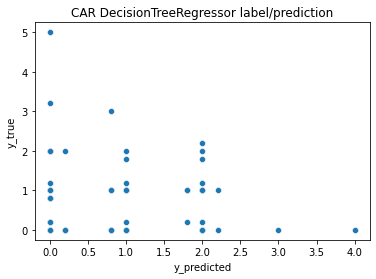

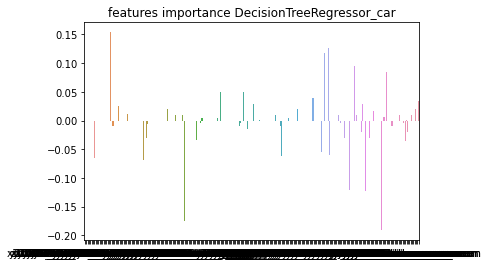

In [85]:
####DecisionTreeRegressor CAR####

steps_DecisionTreeRegressor = [
    ( 'scaler', StandardScaler()),
    ('model', DecisionTreeRegressor(max_depth=40))
]

pipeline_DecisionTreeRegressor_car = Pipeline(steps_DecisionTreeRegressor)
pipeline_DecisionTreeRegressor_car.fit(X_train_car,y_train_car)
y_p_car_DecisionTreeRegressor = pipeline_DecisionTreeRegressor_car.predict(X_test_car)
y_car_pip_DecisionTreeRegressor = y_test_car


### METRICHE MISURA ACCURATEZZA PER CAR
mse_car_pip_DecisionTreeRegressor = mean_squared_error(y_car_pip_DecisionTreeRegressor, y_p_car_DecisionTreeRegressor)
print("MSE_car_pip_DecisionTreeRegressor:", mse_car_pip_DecisionTreeRegressor)
mae_car_pip_DecisionTreeRegressor = mean_absolute_error(y_car_pip_DecisionTreeRegressor, y_p_car_DecisionTreeRegressor)
print("MAE_car_pip_DecisionTreeRegressor:", mae_car_pip_DecisionTreeRegressor)
r2_car_score_DecisionTreeRegressor= r2_score(y_car_pip_DecisionTreeRegressor, y_p_car_DecisionTreeRegressor)
print("R2_car_score_DecisionTreeRegressor:", r2_car_score_DecisionTreeRegressor)


###STAMPA GRAFICI 

graf_car(y_p_car_DecisionTreeRegressor, y_car_pip_DecisionTreeRegressor.values, "DecisionTreeRegressor")
plt.show()

res = permutation_importance(pipeline_DecisionTreeRegressor_car, X_test_car, y_test_car, n_repeats=1)
df = pd.DataFrame(res['importances'].T, columns= X_train_car.columns)
plt.title('features importance DecisionTreeRegressor_car')
sns.barplot(data=df)
plt.show()

MSE_camion_pip_DecisionTreeRegressor: 0.13546286140556027
MAE_camion_pip_DecisionTreeRegressor: 0.21224302915616544
R2_camion_score_DecisionTreeRegressor: 0.5575252267243535


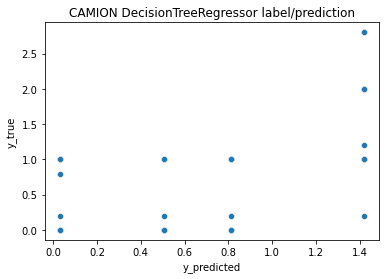

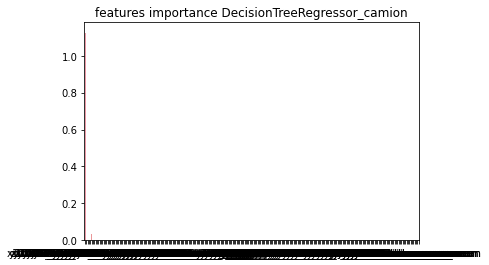

In [86]:
####DecisionTreeRegressor CAMION####

steps_DecisionTreeRegressor = [
    ( 'scaler', StandardScaler()),
    ('model', DecisionTreeRegressor(max_depth=2))
]

pipeline_DecisionTreeRegressor_camion = Pipeline(steps_DecisionTreeRegressor)
pipeline_DecisionTreeRegressor_camion.fit(X_train_camion,y_train_camion)
y_p_camion_DecisionTreeRegressor = pipeline_DecisionTreeRegressor_camion.predict(X_test_camion)
y_camion_pip_DecisionTreeRegressor = y_test_camion


### METRICHE MISURA ACCURATEZZA PER CAMION
mse_camion_pip_DecisionTreeRegressor = mean_squared_error(y_camion_pip_DecisionTreeRegressor, y_p_camion_DecisionTreeRegressor)
print("MSE_camion_pip_DecisionTreeRegressor:", mse_camion_pip_DecisionTreeRegressor)
mae_camion_pip_DecisionTreeRegressor = mean_absolute_error(y_camion_pip_DecisionTreeRegressor, y_p_camion_DecisionTreeRegressor)
print("MAE_camion_pip_DecisionTreeRegressor:", mae_camion_pip_DecisionTreeRegressor)
r2_camion_score_DecisionTreeRegressor= r2_score(y_camion_pip_DecisionTreeRegressor, y_p_camion_DecisionTreeRegressor)
print("R2_camion_score_DecisionTreeRegressor:", r2_camion_score_DecisionTreeRegressor)


###STAMPA GRAFICI 

graf_camion(y_p_camion_DecisionTreeRegressor, y_camion_pip_DecisionTreeRegressor.values, "DecisionTreeRegressor")
plt.show()

res = permutation_importance(pipeline_DecisionTreeRegressor_camion, X_test_camion, y_test_camion, n_repeats=1)
df = pd.DataFrame(res['importances'].T, columns= X_train_camion.columns)
plt.title('features importance DecisionTreeRegressor_camion')
sns.barplot(data=df)
plt.show()

MSE_car_pip_BayesianRidge: 0.5420612098960716
MAE_car_pip_BayesianRidge: 0.5645477592819937
R2_car_score_BayesianRidge: 0.047547178558436265


C:\Users\giovy\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


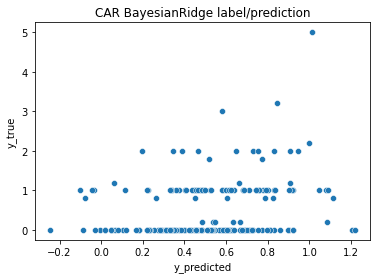

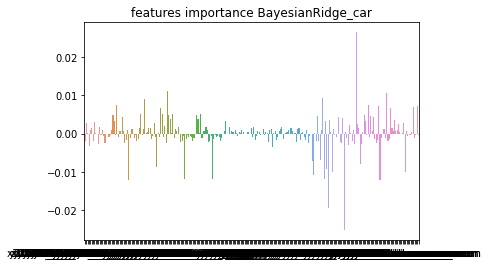

In [87]:
####BayesianRidge CAR####

steps_BayesianRidge = [
    ( 'scaler', StandardScaler() ),
    ('model', BayesianRidge())
]

pipeline_BayesianRidge_car = Pipeline(steps_BayesianRidge)
pipeline_BayesianRidge_car.fit(X_train_car,y_train_car)
y_p_car_BayesianRidge = pipeline_BayesianRidge_car.predict(X_test_car)
y_car_pip_BayesianRidge = y_test_car


### METRICHE MISURA ACCURATEZZA PER CAR
mse_car_pip_BayesianRidge = mean_squared_error(y_car_pip_BayesianRidge, y_p_car_BayesianRidge)
print("MSE_car_pip_BayesianRidge:", mse_car_pip_BayesianRidge)
mae_car_pip_BayesianRidge = mean_absolute_error(y_car_pip_BayesianRidge, y_p_car_BayesianRidge)
print("MAE_car_pip_BayesianRidge:", mae_car_pip_BayesianRidge)
r2_car_score_BayesianRidge= r2_score(y_car_pip_BayesianRidge, y_p_car_BayesianRidge)
print("R2_car_score_BayesianRidge:", r2_car_score_BayesianRidge)


###STAMPA GRAFICI 

graf_car(y_p_car_BayesianRidge, y_car_pip_BayesianRidge.values, "BayesianRidge")
plt.show()

res = permutation_importance(pipeline_BayesianRidge_car, X_test_car, y_test_car, n_repeats=1)
df = pd.DataFrame(res['importances'].T, columns= X_train_car.columns)
plt.title('features importance BayesianRidge_car')
sns.barplot(data=df)
plt.show()

MSE_camion_pip_BayesianRidge: 0.09081209378371287
MAE_camion_pip_BayesianRidge: 0.20393703101350977
R2_camion_score_BayesianRidge: 0.7033721258306023


C:\Users\giovy\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


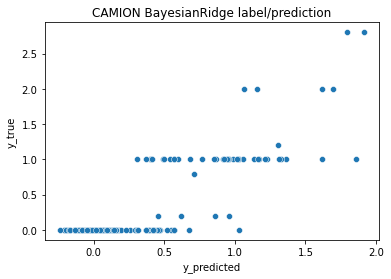

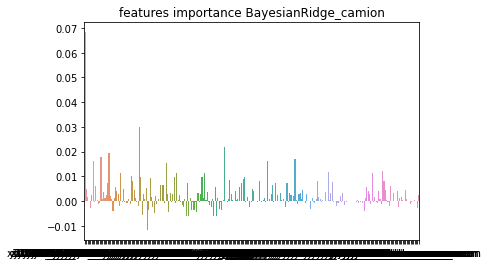

In [88]:
####BayesianRidge CAMION####

steps_BayesianRidge = [
    ( 'scaler', StandardScaler() ),
    ('model', BayesianRidge())
]

pipeline_BayesianRidge_camion = Pipeline(steps_BayesianRidge)
pipeline_BayesianRidge_camion.fit(X_train_camion,y_train_camion)
y_p_camion_BayesianRidge = pipeline_BayesianRidge_camion.predict(X_test_camion)
y_camion_pip_BayesianRidge = y_test_camion


### METRICHE MISURA ACCURATEZZA PER CAMION
mse_camion_pip_BayesianRidge = mean_squared_error(y_camion_pip_BayesianRidge, y_p_camion_BayesianRidge)
print("MSE_camion_pip_BayesianRidge:", mse_camion_pip_BayesianRidge)
mae_camion_pip_BayesianRidge = mean_absolute_error(y_camion_pip_BayesianRidge, y_p_camion_BayesianRidge)
print("MAE_camion_pip_BayesianRidge:", mae_camion_pip_BayesianRidge)
r2_camion_score_BayesianRidge= r2_score(y_camion_pip_BayesianRidge, y_p_camion_BayesianRidge)
print("R2_camion_score_BayesianRidge:", r2_camion_score_BayesianRidge)


###STAMPA GRAFICI 

graf_camion(y_p_camion_BayesianRidge, y_camion_pip_BayesianRidge.values, "BayesianRidge")
plt.show()

res = permutation_importance(pipeline_BayesianRidge_camion, X_test_camion, y_test_camion, n_repeats=1)
df = pd.DataFrame(res['importances'].T, columns= X_train_camion.columns)
plt.title('features importance BayesianRidge_camion')
sns.barplot(data=df)
plt.show()

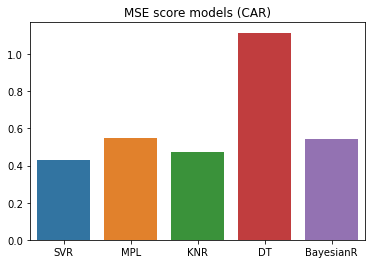

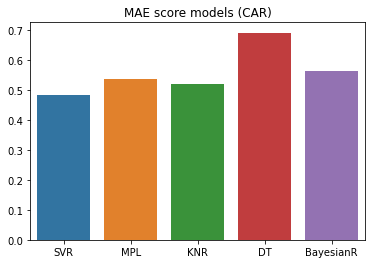

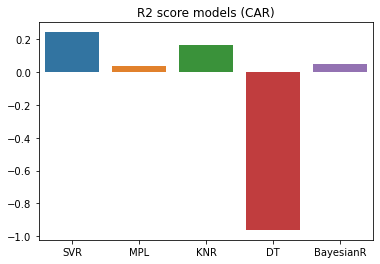

In [90]:
#### MODELLI CAR:
modelli = ["SVR", "MPL", "KNR", "DT", "BayesianR"]
MSE_car = [mse_car_pip_svr, mse_car_pip_MLPRegressor, mse_car_pip_KNeighborsRegressor, mse_car_pip_DecisionTreeRegressor, mse_car_pip_BayesianRidge]
MAE_car = [mae_car_pip_svr, mae_car_pip_MLPRegressor, mae_car_pip_KNeighborsRegressor, mae_car_pip_DecisionTreeRegressor, mae_car_pip_BayesianRidge]
R2_car =  [r2_car_score_svr, r2_car_score_MLPRegressor, r2_car_score_KNeighborsRegressor, r2_car_score_DecisionTreeRegressor, r2_car_score_BayesianRidge]

plt.title('MSE score models (CAR)')
sns.barplot(x=modelli, y=MSE_car)
plt.show()

plt.title('MAE score models (CAR)')
sns.barplot(x=modelli, y=MAE_car)
plt.show()

plt.title('R2 score models (CAR)')
sns.barplot(x=modelli, y=R2_car)
plt.show()


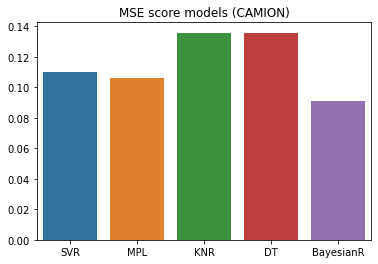

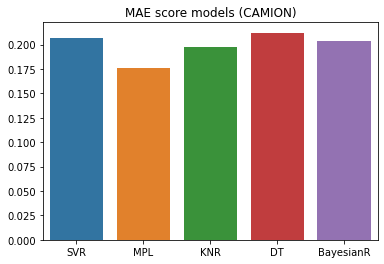

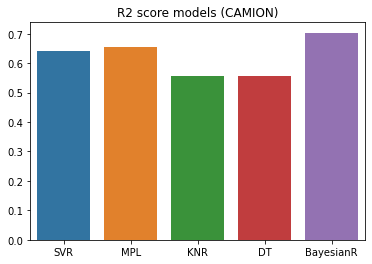

In [91]:
#### MODELLI CAMION:
modelli = ["SVR", "MPL", "KNR", "DT", "BayesianR"]
MSE_camion = [mse_camion_pip_svr, mse_camion_pip_MLPRegressor, mse_camion_pip_KNeighborsRegressor, mse_camion_pip_DecisionTreeRegressor, mse_camion_pip_BayesianRidge]
MAE_camion = [mae_camion_pip_svr, mae_camion_pip_MLPRegressor, mae_camion_pip_KNeighborsRegressor, mae_camion_pip_DecisionTreeRegressor, mae_camion_pip_BayesianRidge]
R2_camion =  [r2_camion_score_svr, r2_camion_score_MLPRegressor, r2_camion_score_KNeighborsRegressor, r2_camion_score_DecisionTreeRegressor, r2_camion_score_BayesianRidge]

plt.title('MSE score models (CAMION)')
sns.barplot(x=modelli, y=MSE_camion)
plt.show()

plt.title('MAE score models (CAMION)')
sns.barplot(x=modelli, y=MAE_camion)
plt.show()

plt.title('R2 score models (CAMION)')
sns.barplot(x=modelli, y=R2_camion)
plt.show()